# Neuronų tinklai

## Basic concept

### Perceptronas

Pirmoji idėja yra perceptronas, tai yra dirbtinis neuronas. Paprastai įsivaizduojant neuroną galima sakyti, kad jis susideda iš dentritų (įvestys), branduolio (skaičiavimų/funkcijos) ir aksono (išvsesties). Tą galime išreikšti matematiškai.
Perceptrono modelio pvz.: y = (x1w1+b) + (x2w2+b) + ...
y - išvestis, x1x2... - įvestys, suma - skaičiavimas, gali būti bet kokia funkcija, w1w2 - svoriai, kurie yra koreguojami mokymosi metu, skirti, kad būtų galima "mokytis" t.y. keisti juos, kad geriau atitiktų išvestį (kontroliuojamas mokymasis), b - bias term, papildomas kintamasis, skirtas atsižvelgti į tai, kad įvestis gali būti 0, tuo atveju nesvarbu kaip keitaliosim svorį, nieko neišmoksim, tai atsiranda papildomas parametras.

### Neuronų tinklas

Vienas perceptronas, kaip ir vienas neuronas aišku nėra labai protinga. Taigi, perceptronus galime susjungti į daugiasluoksnį perceptronų modelį - neuronų tinklą. Šiame modelyje jungiami perceptronų sluoksniai (kiekvienas perceptronas sujungtas su kito sluoksnio kiekvienu perceptronu). Vieno perceptrono išvestis yra kito įvestis. Modelis susideda iš įvesties sluoksnio, paslėptų sluoksnių, išvesties sluoksnių. Neuronų tinklas skaitomas kaip gylus neuronų tinklas, kai paslėptų sluoksnių >= 2. Juos sunku interpretuoti, nes jų gali būti daug, visaip sujungtų ir neaišku ką kiekvienas sluoksnis tiksliai daro. Tinklo **plotis** (width) - kiek neuronų tinkle, tinklo **gylis** - kiek sluoksnių yra tinkle.

Matematiškai įrodyta, kad kiekvienai tolydžiai funkcijai (kurią galima integruoti) egzistuoja neuronų tinklas aproksimuojantis tą funkciją (universal approximation theorem).

### Aktivacijos funkcijos

Sprendžiant realias užduotis, dažnai reikia, kad tinklo funkcija grąžintų išvestį tik tarp tam tikrų ribų, pvz. [0,1]. Tuomet kiekviena išvestis yra tikimybė parodanti tos išvesties tikėtinumą. Jeigu tiesiog sumuosim kaip mūsų perceptrono pvz. tai neturėsim viršutinio išvesties rėžio. Šiems rėžiams gauti naudojamos aktivacijos funkcijos.

Paprastas perceptronas - y = x * w + b. Svoris, parodo įvesties svarbą, kuo didesnis tuo svarbesnis x. Apie b parametrą galima galvoti kaip apie **kompensavimo** parametrą, jis parodo kokį slenkstį reikia pasiekti, kad x * w turėtų prasmingą efektą funkcijos išvesčiai. Pvz. b = -10. Kol x * w < 10, tol b turi didelę svarbą, bet po to jau svorio svarba didėja.

Aktivacijos funkcija kaip įvestį priėma x * w + b. Pavadinkime tai z. Taigi aktivacijos funkcija f(z) - transformuoja neurono išvestį į kitokius rėžius. 

Populiarios aktivacijos funkcijos klasifikavimo užduotims: 

* sigmoid funkcija: f(z) = 1/(1+e^(-z)). Ji transformuoja išvestį į tarp [0;1] ir atsižvelgia į mažus z pokyčius. 
* hiperbolinis tangentas: tanh(z) = sinh(z) / cosh(z), kur sinh(z) = (e^z - e^(-z)) / 2 ir cosh(z) =  (e^z + e^(-z)) / 2. Atrodo taip pat kaip sigmoid funkcija, bet apibrėžimo sritis yra [-1;1].
* ReLU (Rectified linear unit) f(z) = max(0,z). Jeigu z mažiau lygu už 0, tai nulis, bet jeigu daugiau, tai pati z reikšmė. Ši aktivacijos funkcija dažnai naudojama kaip default, nes rasta, kad turi gerą performance. Padeda išspręsti **vanishing gradient** problemą.

Visos šios aktivacijos funkcijos skirtos regresijai arba binarinei klasifikacijai. O kaip su daugiaklase klasifikacija ? Tuomet išvesties sluoksnio tinklui padidinamas plotis. Neuronų tinklui reikalingos skaitinės reikšmės. Jeigu turim strings, tuomet naudojam one-hot encoding (dummy variables). Multiklasifikavimo situacijos gali būti dvi:
* klasės suderintos - duomenų įrašas/taškas gali turėti kelias klasės reikšmes vienu metu. Galima naudoti sigmoid funkciją, sakom jeigu neurono tikimybę > 0.5, tai  turės to neurono klasės reikšmę (tokiu atvejų gali būti daugiau negu vienas, suderinta - įgauna reikšmių masyvą)
* klasės nesuderintos - duomenų įrašas/taškas turi tik vieną klasės reikšmę. Naudojama softmax aktivacijos funkcija. Ji duoda tikimybes, tuomet kiekvienas išvesties neuronas parodo su juo asocijuotos klasės reikšmės tikėtinumą (tikimybę). 

Side note: realiame gyvenime z yra matrica (tensorius) todėl dažnai vadovėliuose parodyta kaip Z.

## Kaip tinklas mokosi ?

### Klaidų funkcijos

Klaidos funkija padeda įvertinti modelio spėjimo paklaidą (mokymosi/treniravimosi metu) lyginant su žinoma klasės reikšme (kontroliuojamas mokymas). Viena iš populiariausių klaidos funkcijų yra kvadratinė klaidos funkcija - tai tiesiog MSE (mean squared error), bet pritaikyta multidimensiniems duomenims. Iš kiekvienos tikrosios reikšmės atėmame spėtą ir tą skirtumą pakeliame kvadratu (kad turėt absoliųtų įvertį ir bausti didelius skirtumus/paklaidas) ir sumuojam visus įrašų skirtumus. Taigi, (y - a(x))^2, kur y - tikroji reikšmė, a - aktivacijos funkcija. Viską sumuojam ir padalinam iš 2 * n (gaunasi, vidurkis/2).

Reikia nepamiršti tikslo - minimizuoti paklaidas. Kaip sužinoti kurie svoriai sukelia mažiausias paklaidas ? Tai yra tiesiog problema surasti klaidos funkcijos mažiausią reikšmę. Galima spresti lygtis išvestinė = 0. Tačiau reliame pasaulyje klaidų funkcijos labai sudėtingos, daugiadimensinės(daug svorių), net kompiuteriams labai daug laiko reiktų spręsti analitiškai. Dėl to naudojamas stochastinis metodas - gradientas (gradient descent).

#### Gradiento metodas

Pasirenkam atsitiktinį funkcijos tašką. Randam to taško slope (nuolydis). Pagal tą slope "einam" per funkciją žemyn ir kartojam kitam taškui kol randam slope arti 0 (radom minimumą) arba baigėsi iteracijų skaičius. Kitą tašką randam pagal step size, kurį patys pasirenkame. Kuo daugiau steps, tuo daugiau taškų tikrinam, bet tuo ilgiau užtrunka rasti minimumą. Kuo mažesnis tuo geričiau, bet galim per daug "nueiti" ir "nepagauti" minimumo, o atsidurti prie teigiamo slope. Step size ML kontekste vadinamas learning rate, tai yra hyperparametras neuronų tinklo. Kiek taškų tikrinam t.y. kiek iteracijų irgi yra hyperparametras.

sekantis taškas = pradinis taškas - learning rate * funkcijos, kurios minimumą ieškom išvestinė pradiniame taške.

Adaptyvus gradientas - kai step size nėra pastovaus dydžio. Tarkim iš pradžių nuo taško iki taško pereinam dideliais žingsniais, o atrėjant prie minimumo mažinam. Čia vienas būdas, bet yra kitų, dėl to galima rinktis įvairius adaptyvaus gradiento algoritmus, vienu iš geriausiu skaitosi - Adam (optimizuotas adaptyvus gradientas).

Kai kalba eina apie n-dimensinius vektorius (tensorius) išvestinė vadinama gradientu (matematinė notacija - apverstas trikampis).

Dažnai klasifikacijoje klaidos funkcija pasirenkama - cross entropy function. Sakoma, kad modelis spėja tikimybinį pasiskirstymą kiekvienai klasei. Tinka tiek binarinei, tiek multiklasinei klasifikacijai. 

### Backpropogation

Backpropogation esmė - atnaujinti tinklo svorius ir šališkumo/kompensavimo parametrą. Atnaujinam atsižvelgiant į klaidos funkcijos minimumą. Grįžtam nuo išvesties neurono atgaline tvarka iki įvesties neurono. Mes norim suprasti ant kiek klaidos funkcija jautri svorių pasikeitimams. Dėl to grįžtan per visus neuronus ir sluoksnius, kiekviename sluoksnyje pritaikom "chain-rule", kad išsireikšti klaidos funkciją parametrų atžvilgiu, tuomet skaičiuojame dalinės išvestinės tų parametrų atžvilgiu (svorio ir šališkumo) ir naudodami gradient descent randam minimumus. Taigi, mes "nešame" paklaidą atgal per sluoksnius ir pagal tai atnaujinam svorius ir šališkumą.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Regresijos pvz.

In [2]:
df = pd.read_csv('inp_files/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


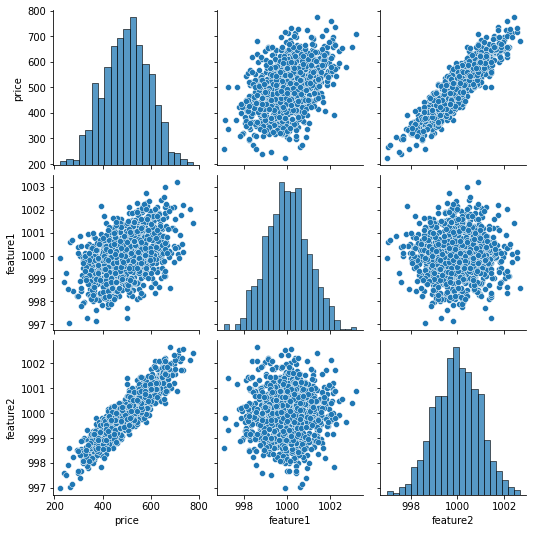

In [3]:
sns.pairplot(df)
plt.show() # matome, kad feature2 koreliuoja su price

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('price',axis=1)
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# kadangi neuroniniame tinkle vyksta daugyba, tai gali susikaupti didelės reikšmės, dėl to gali nukentėti
# tikslumas (kompiuteriui sunku tikslaiai paskaičiuoti floats reikšmes).
# Tai yra vanishing gradient problema

In [8]:
X_train = scaler.fit_transform(X_train) # fit on training set
X_test = scaler.transform(X_test) # we don't fit on test set to prevent data leakage
# neturėtume žinoti apie testavimo duomenis treniruojant, scale'inant, nes tai būtų sukčiavimas. 
# Norime patikrinti ant nematytų/nežinitų duomenų.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# tensorflow - neuroninių tinklų lib
# keras - kitas libas, kuris gali naudoti įvairius neural networks libs, padaro jų api patogesniais naudotis
# nuo tensorflow 2.0 keras yra built-in

In [18]:
# sukuriam sequential modelį ir pridedam į jį sluoksnius, kur nurodom neuronų kiekį ir aktivacijos funkciją.
# Dense, tai reiškia kiekvienas neuronas sujungtas su kito sluoksnio neuronu.
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [19]:
# kitoks būdas tą patį padaryt. Dažniau naudojamas, nes galim komentint ir editint greit/patogiau.
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
# galiausiai kompiluojame, pasirinkdami gradiento algoritmą ir klaidos funkciją
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [20]:
# epochs - epochos t.y. kiek kartų iteruoti duomenis. epochs=1 reikštų, kad vieną kartą praėjom train duomenis
model.fit(x=X_train,y=y_train,epochs=250,verbose=0)

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,256893.765625
1,256763.156250
2,256691.171875
3,256626.656250
4,256557.484375
...,...
245,24.092621
246,24.382740
247,24.219872
248,24.537001


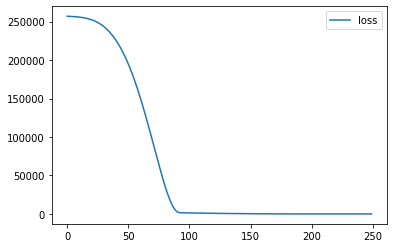

In [23]:
loss_df.plot()
plt.show()
# matome, kad iš pradžių paklaidos labai didelės, bet iteruojant ("mokantis") mažėja.

In [24]:
model.evaluate(X_test, y_test, verbose=0) # grąžina mse, įvertinam gerumą ant nematytų duomenų

24.989856719970703

In [25]:
model.evaluate(X_train, y_train, verbose=0) # grąžina mse

24.15669059753418

In [26]:
preds = model.predict(X_test)
preds[:5] # modelio spėjamos kainos

array([[404.95328],
       [623.2102 ],
       [591.80176],
       [571.8944 ],
       [366.27744]], dtype=float32)

In [44]:
preds = pd.Series(preds.reshape(300,))
pred_df = pd.concat([y_test.reset_index(drop=True),preds],axis=1)
pred_df.columns = ['Test True y', 'Model Predictions']
pred_df.head()

,Test True y,Model Predictions
0,402.296319,404.953278
1,624.156198,623.210205
2,582.455066,591.801758
3,578.588606,571.894409
4,371.224104,366.277435


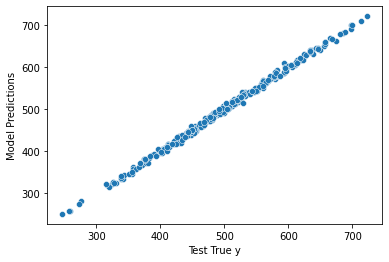

In [45]:
sns.scatterplot(data=pred_df,x='Test True y', y='Model Predictions')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
mean_squared_error(pred_df['Test True y'],pred_df['Model Predictions'])
# tas pats kaip: model.evaluate(X_test, y_test, verbose=0)

24.98986093377535

In [50]:
mean_absolute_error(pred_df['Test True y'],pred_df['Model Predictions'])
# Ar gerai spėlioja modelis ?
# paklaida yra 4 doleriai, galim pažiūrėt į price vidurkį ir min,max reikšmes ir pamatysim ar tai gerai ar blogai

4.000151102309195

In [51]:
df['price'].describe()
# matom, kad vidurkis 498, tai 4 doleriai yra mažiau už 3%, kas yra geras rezultatas
# iš grafiko irgi matosi, nes praktiškai tiesė, beveik sutampa a.k.a x=y

count    1000.000000
mean      498.673029
std        93.785431
min       223.346793
25%       433.025732
50%       502.382117
75%       564.921588
max       774.407854
Name: price, dtype: float64

In [52]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem) # naujo akmens kaina - 419$

array([[419.34933]], dtype=float32)

### modelio išsaugojimas:
model.save('my_model.h5')
from tensorflow.keras.models import load_model
later_model = load_model('my_model.h5') # čia gali duot warning, tai tsg nekreipt dėmesio

## Kiti parametrai ir dealing with overfiting

Kai kviečiam fit, galim paduot parametrą - **validation_data=(X_test,y_test)**. Tuomet kiekvienoje iteracijoje palyginami spėjimai su tikraisiais duomenimis. Jie išsaugomi modelyje ir pasiekiami model.history.history. Tada gaunam du stulpelius, vienas klaidos funkcijos reikšmės ant train duomenų, kitas klaidos funkcijos reikšmės ant test (validacijos) duomenų. Turint šiuos duomenis galima paversti į df ir plot'int, taip pamatysim ar vyksta overfiting. Visalaiką turėtų mažėti klaidos vykstant iteracijoms. Jeigu validacijos paklaidos pradeda didėti, tai reiškia, kad vysta overfiting (modelis nesugeba normaliai spėlioti iš nematytų duomenų). Kol paklaidos mažėja tol teoriškai reiktšų toliau vykdyti iteracijas (nors galima ir nutraukti, jeigu nedaug progreso pasiekiam).

Taip pat yra parametras **batch_size**. Jį naudojam, kai didelė duomenų apimtis, kad treniruoti modelį mažesnėmis imtimys. Dažnai pasirenkamas 2^?, pvz 128. Kuo mažesnis, tuo ilgiau užtruks apmokyti modelį, bet sumažėja tikimybė overfitinti (kadangi ne viską iškart paduodam, tai modelis geriau išmoks atpažinti nematytus duomenis).

Sužinoti ar vyksta overfiting, jau žinom, kad galima paduot validation data ir nusipiešti grafiką. Ką daryti kai aptinkame overfiting ? Svarbu žinoti kaip sukurti modelį be overfiting. Tam naudojami early stop callbacks ir dropout layers.

Galima anksti sustabdyti mokymo procesą pagal kokią nors sąlyga tikrinant ant validacijos duomenų. Paduodam funkcija su ta salyga - **early stop callback**.

**Dropout sluoksnis** - sluoksnis su savybe išjungti kai kuriuos neuronus treniruojant, kad išvengti overfiting. Veikia taip: išmeta naudotojo pasirinktą procentą neuronų (prieš tai esančiame sluoksnyje) kiekvieną kartą paduodant naują batch (arba kiekvienoje epochoje, jeigu batch_size nenurodytas). Išjungti neuroną reiškia nebeatnaujinti jo svorių ir šališkumo parametrų.

## Toliau klasifikacijos pvz.

In [63]:
df = pd.read_csv('inp_files/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
X = df.drop('benign_0__mal_1',axis=1).values # values returns regular python list instead of numpy array
y = df['benign_0__mal_1'].values # we need values, because tensorflow does not work well with numpy arrays

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from tensorflow.keras.layers import Dropout

In [67]:
X_train.shape # turime ganėtinai mažai eilučių ir 30 bruožų

(426, 30)

In [68]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# kadangi vyksta binarinė klasifikacija (yra/nėra vėžio) naudojam sigmoid išvesties sluoksnyje
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test), verbose=0)
# pasirinkome labai per daug epochų, kad pamatyt overfiting

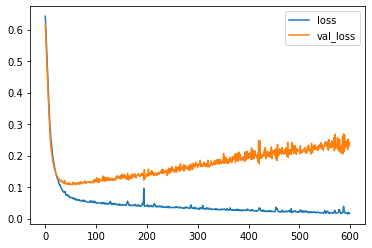

In [70]:
pd.DataFrame(model.history.history).plot()
plt.show()
# matome overfiting, ant treniruojamų duomenų paklaidos mažėja (mėlina)
# bet ant nematytų test/validation duomenų (oranžinė) paklaidos pradeda didėti po tam tikro epochų skaičiaus
# akivaizdu, kad naudojam per daug epochų

In [71]:
# dabar pažiūrėkim, kaip galim to išvengti su early stop functions
# prima, iš naujo pasigaminam modelį tą patį modelį
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
# seksime paklaidas ir žiūrėsim ar jos mažėja (minimizuojam)
# patience - kiek epochų palaukti kol nutraukiam mokymą t.y. ne iš karto, kai nustoja mažėti paklaidos
# o palaukti biški, nes gal tiesiog galėjo nuo duomenų triukšmo pradėti mažėti
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=0)

In [74]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test), verbose=0, callbacks=[early_stop])
# per verbose, galima pamatyti, kokius loss skaičiuoja kiekvienoje iteracijoje ir kada nustojo mokymą
# kadangi padavėm eraly stoping, tai nebereikia jaudintis dėl pasirinkto epochų skaičiaus

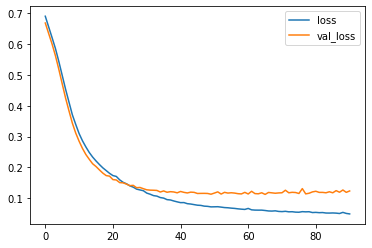

In [75]:
pd.DataFrame(model.history.history).plot()
plt.show()
# tą ir norime matyti, abiejų aibių paklaidos mažėja ir kai pradeda tolti viena nuo kitos sustojam.
# oranžinė kreivė dar tęsiasi toliau, nes mes pasirinkom 25 epochas dar runnint papildomai po padidėjimo
# matosi maži padidėjimai, sumažėjimai, tai normalu, nes maždaug tiesiai eina kreivė, svarbu, kad nebūtų
# didelio paklimo, šuolio į viršų.

In [77]:
# dabar pažiūrėkim, kaip galim to išvengti su dropout layers
# prima, iš naujo pasigaminam modelį tą patį modelį
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
# 50% procentų atsitiktinai pasirinktų neuronų išjungsim po kiekvienos epochos.
# Kiekvieną kartą išjungiami ne tie patys, o kiti 50% atsitiktinių neuronų.
# Dažnai pasirenkama išjungti 20%-50%. Tai turėtų dar labiau sumažinti overfiting.

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test), verbose=0, callbacks=[early_stop])
# jeigu su verbose būtųme fitine, pamatytumėme, kad dabar daugiau epochų mokėsi kol įvyko early_stop.
# Taip yra dėl išjungiamų neuronų, ir tai gerai, nes daugiau laiko mokėsi modelis.

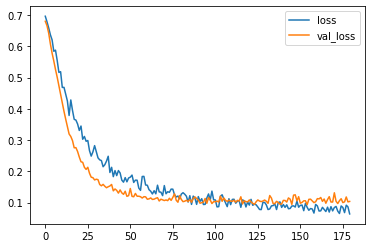

In [79]:
pd.DataFrame(model.history.history).plot()
plt.show()
# dabar dar geriau. Netgi fantastiška, nes abiejų aibių paklaidos mažėja vienodai ir plokšėja, o ne didėja.
# palyginus su pirmuoju grafiku, kur jau po 100 epochų buvo didelis overfiting
# dabar treniruojam beveik 200 ir kreivės beveik sutampa.

tensorflow\python\keras\engine\sequential.py:455: UserWarning: model.predict_classes() is deprecated and will be removed after 2021-01-01. Please use instead: **np.argmax(model.predict(x), axis=-1)**, if your model does multi-class classification (e.g. if it uses a softmax last-layer activation). **(model.predict(x) > 0.5).astype("int32")**, if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

In [85]:
preds = (model.predict(X_test) > 0.5).astype("int32")
preds[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(y_test,preds))
# geri įverčiai, geras tikslumas (accuracy)
# tikslumas, mums tinka kaip metrika, nes sąlyginai balansuota klasė t.y. apyligiai nulių ir vientų klasėje

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [88]:
confusion_matrix(y_test,preds) # nedaug blogai klasifikuotų, tik 4

array([[54,  1],
       [ 3, 85]])

### Tensorboard

Tensorboard - yra atskira programa, kuri kaip jupyter-notebook dirba ant kokio nors port ir pasieki naršyklėje per localhost. Ten gali pažiūrėti savo modelio vizualizacijas visokias ir labiau jį tirinėti. Tam įgalinti reikia, paduoti TensorBoard callbaką (lygiai taip pat kaip su EarlyStoping viršuj). Per jį susikonfigini ką nori, kad įrašytų/išsaugotų ir į kokią direktoriją (default logs/fit). Tuomet paleidi tensorboard programą ir paduoti tą direktoriją į kuria įrašė visą modelio info.

Daugiau info: tensorflow.org/tensorboard/get_started